#### Locally weighted Regression through Closed form solution

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression,load_boston

## Loading the data


In [152]:
dfx = pd.read_csv("/Users/apoorvgarg/Documents/GitHub/machine-learning-online-2018/Datasets/Locally Weighted Regression/weightedX.csv")
dfy = pd.read_csv("/Users/apoorvgarg/Documents/GitHub/machine-learning-online-2018/Datasets/Locally Weighted Regression/weightedY.csv")

In [153]:
X = dfx.values
Y = dfy.values

In [154]:
print(X.shape,Y.shape)

(99, 1) (99, 1)


In [155]:
# Normalize the data
u = X.mean()
std = X.std()
X = (X-u)/std

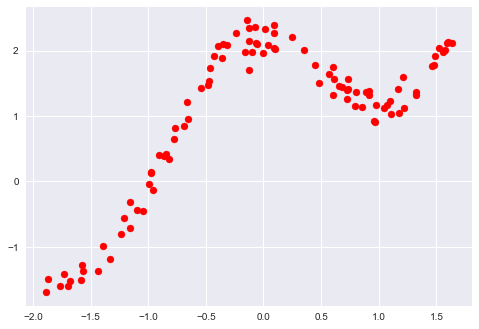

In [156]:
# visualization
plt.style.use("seaborn")
plt.scatter(X,Y,color="red")
plt.show()

In [157]:
# How to generate W for any query point
# np.eye()  # --> Generate diagonal matrix
def getW(query_point,X,tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))

    for i in range(M):
        xi = X[i]
        x  = query_point
        W[i,i] =  np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return W

In [158]:
X = np.mat(X)
Y = np.mat(Y)
M = X.shape[0]
w =getW(-1,X,1)
print(w.shape)
print(w)

(99, 99)
[[0.81327022 0.         0.         ... 0.         0.         0.        ]
 [0.         0.98353311 0.         ... 0.         0.         0.        ]
 [0.         0.         0.81193405 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.59936711 0.         0.        ]
 [0.         0.         0.         ... 0.         0.2758226  0.        ]
 [0.         0.         0.         ... 0.         0.         0.08496804]]


In [159]:
# If we put tau = 100
# W becomes a identity matrix hence case of linear regression

### Make prediction

In [160]:
def predict(X,Y,query_x,tau):
    one = np.ones((M,1))
    X_ = np.hstack((X,one))
    # print(X_.shape)

    qx = np.mat([query_x,1])

    W = getW(qx,X_,tau)

    Theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    # print(Theta.shape)
    pred = np.dot(qx,Theta)
    return  Theta,pred

In [161]:
theta,pred = predict(X,Y,1.0,1.0)

In [162]:
print(theta)


[[0.14069504]
 [1.45348191]]


In [163]:
print(pred)

[[1.59417694]]


## Visualize predictions, Analyse the effect of tau

In [164]:
def plotPrediction(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []

    for xq in X_test:
        theta,pred = predict(X,Y,xq,tau)
        Y_test.append(pred[0,0])
    Y_test =np.array(Y_test)
    XO = np.array(X)
    YO = np.array(Y)
    plt.title("tau/Bandwidth parameter %.2f"%tau)
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color="red")
    plt.show()

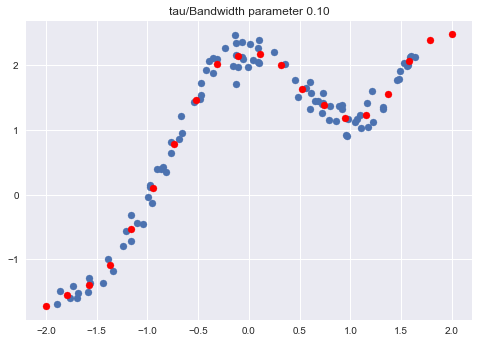

In [165]:
plotPrediction(0.1)

In [166]:
tau = [0.1,0.5,1,5,10]


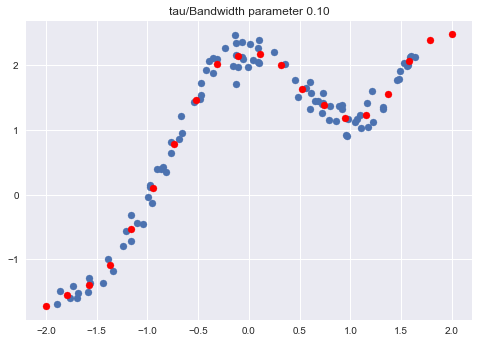

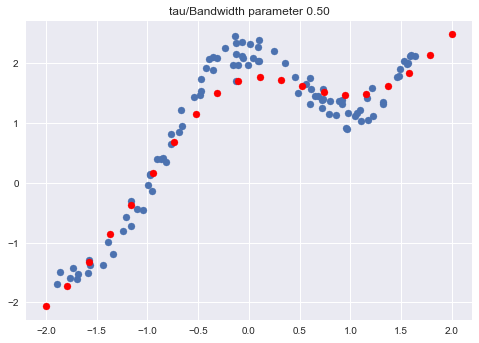

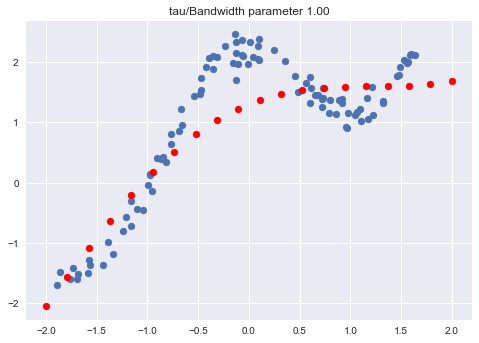

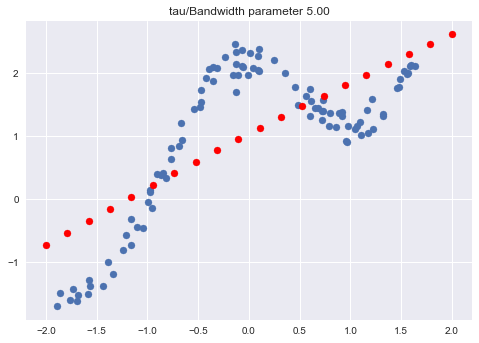

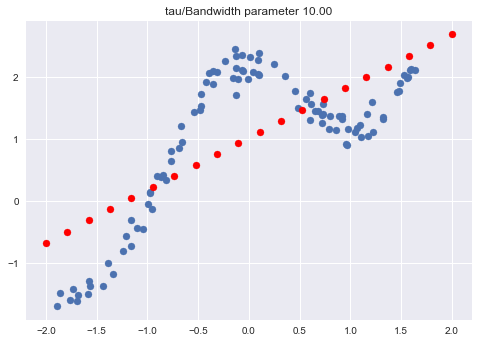

In [167]:
for t in tau:
    plotPrediction(t)